In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math 
import random as rand
from scipy.sparse import coo_matrix, csr_matrix, csc_matrix, vstack, find
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df=pd.read_csv('~/UMDDataChallenge/umd.csv', low_memory=False)
df.head()

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,8798083,840,USA38335,38335,19-Jan-22,2022,1,Protests,Peaceful protest,Protesters (United States),...,Mobile,30.6944,-88.0431,1,Fox10 (Mobile),Subnational,"On 19 January 2022, demonstrators affiliated w...",0,1643146210,USA
1,8798015,840,USA38345,38345,17-Jan-22,2022,1,Protests,Peaceful protest,Protesters (United States),...,Tuscaloosa,33.2098,-87.5692,1,CBS42; Tuscaloosa News,Subnational,"On 17 January 2022, people marched from Beulah...",0,1643146210,USA
2,8798038,840,USA38312,38312,17-Jan-22,2022,1,Protests,Peaceful protest,Protesters (United States),...,Bessemer,33.4017,-86.9544,1,ABC33/40,Subnational,"On 17 January 2022, community members, pastors...",0,1643146210,USA
3,8798044,840,USA38297,38297,17-Jan-22,2022,1,Protests,Peaceful protest,Protesters (United States),...,Montgomery,32.3763,-86.3095,1,Alabama News Network,Subnational,"On 17 January 2022, local residents gathered o...",0,1643146210,USA
4,8798084,840,USA38381,38381,17-Jan-22,2022,1,Protests,Peaceful protest,Protesters (United States),...,Mobile,30.6944,-88.0431,1,Fox10 (Mobile),Subnational,"On 17 January 2022, community members marched ...",0,1643146210,USA


In [48]:
df.columns

Index(['data_id', 'iso', 'event_id_cnty', 'event_id_no_cnty', 'event_date',
       'year', 'time_precision', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'region', 'country', 'admin1', 'admin2', 'admin3',
       'location', 'latitude', 'longitude', 'geo_precision', 'source',
       'source_scale', 'notes', 'fatalities', 'timestamp', 'iso3'],
      dtype='object')

In [49]:
dfyear = df.groupby('year').size()
lyear = list(dfyear)
lyear

[23295, 13904, 573]

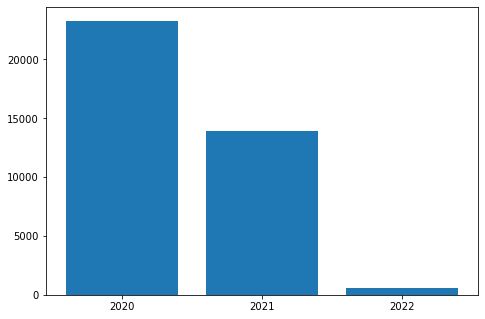

In [50]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
years = ["2020", "2021", "2022"]
ax.bar(years,lyear)
plt.show()

In [51]:
df["event_date"] = pd.to_datetime(df["event_date"]).dt.to_period('M')
dfdate = df.groupby('event_date').size()
ldate = list(dfdate.index)
lcount = list(dfdate.values)

In [53]:
ldate = [str(date) for date in ldate]
print(ldate)
lcount = [int(count) for count in lcount]
print(lcount)

['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01']
[1171.0, 710.0, 420.0, 589.0, 2196.0, 6923.0, 2379.0, 2546.0, 2137.0, 1906.0, 1433.0, 885.0, 1382.0, 879.0, 1600.0, 1715.0, 1532.0, 1134.0, 1038.0, 1095.0, 939.0, 1231.0, 853.0, 506.0, 573.0]


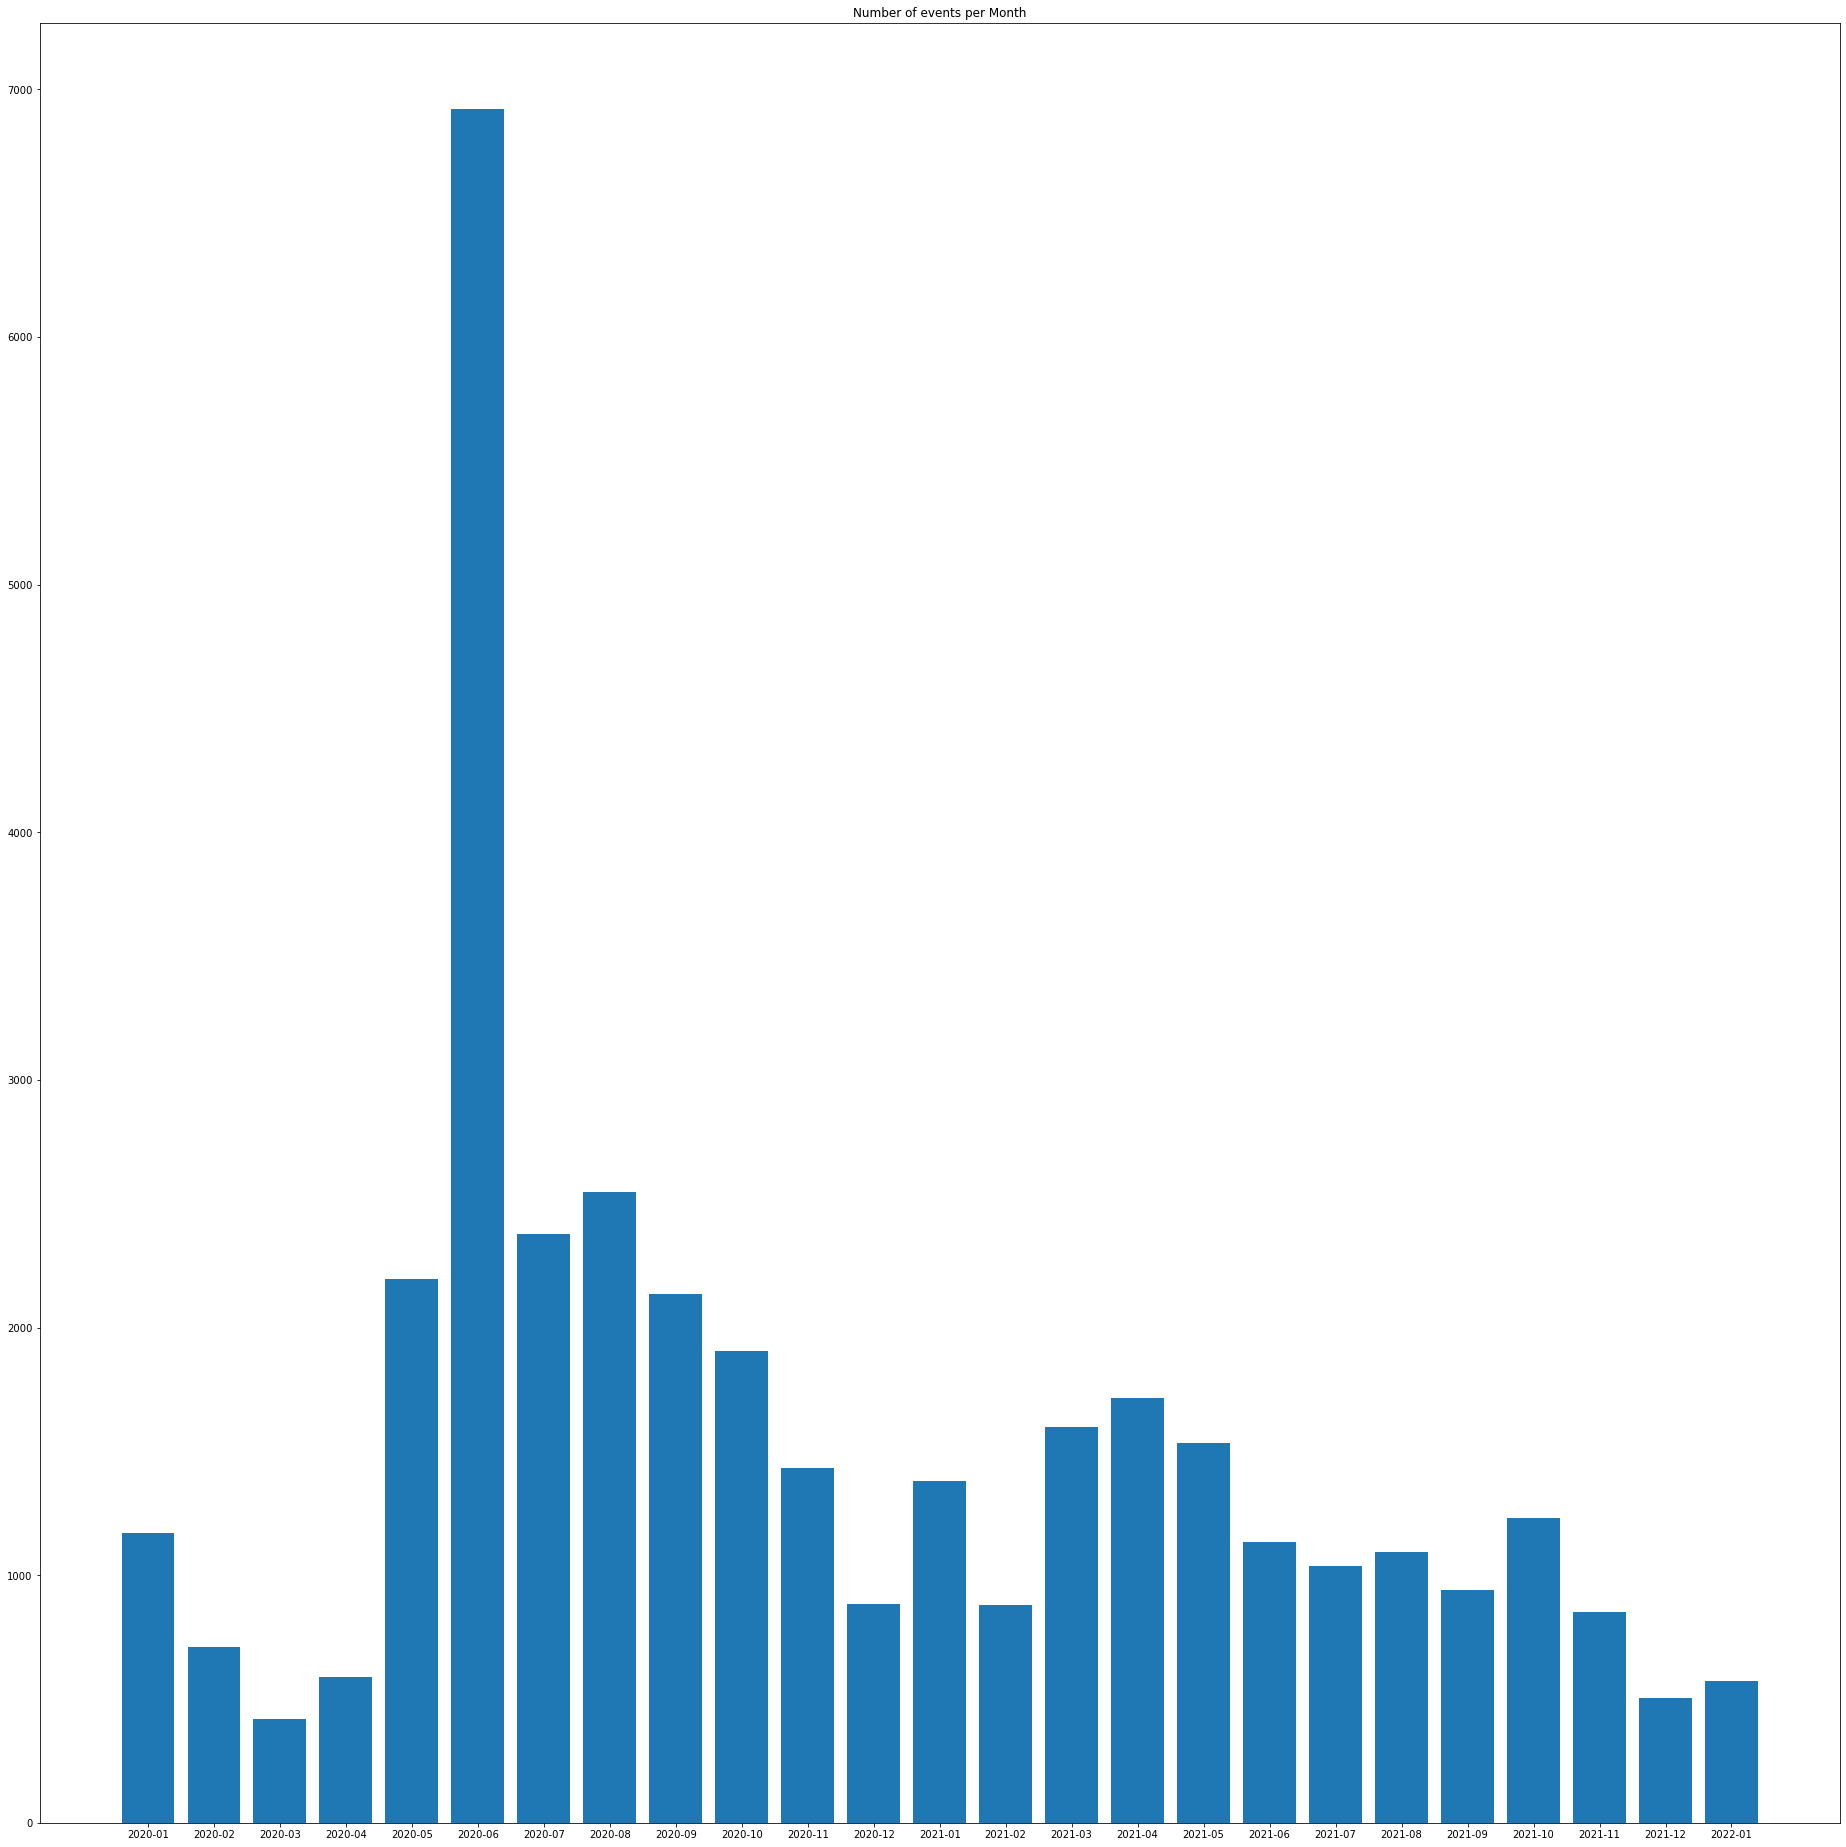

In [59]:
fig = plt.figure(figsize=(len(lcount), len(ldate)))
ax = fig.add_axes([0,0,1,1])
ax.bar(ldate,lcount)
plt.title("Number of events per Month")
plt.show()

In [66]:
dfplace = df.groupby('location').size()
dfplace

location
4S Ranch        1
Abbeville       3
Aberdeen       10
Abilene        17
Abingdon        6
               ..
Zanesville      7
Zephyrhills     1
Zinc            2
Zion            1
Zionsville      2
Length: 4116, dtype: int64

In [67]:
ldate = list(dfplace.index)
lcount = list(dfplace.values)

In [68]:
lplace = [str(date) for date in ldate]
print(ldate)
lcount = [int(count) for count in lcount]
print(lcount)

['4S Ranch', 'Abbeville', 'Aberdeen', 'Abilene', 'Abingdon', 'Abington', 'Absecon', 'Accomac', 'Ackley', 'Acton', 'Acworth', 'Ada', 'Addison', 'Adelanto', 'Adrian', 'Afton', 'Aiken', 'Airmont', 'Airway Heights', 'Ajo', 'Akron', 'Alabaster', 'Alachua', 'Alameda', 'Alamo Heights', 'Alamogordo', 'Alamosa', 'Albany', 'Albemarle', 'Albert Lea', 'Albertville', 'Albion', 'Albuquerque', 'Alcoa', 'Alderson', 'Aldie', 'Aledo', 'Alexandria', 'Alfred', 'Algonac', 'Algonquin', 'Alhambra', 'Alice', 'Aliceville', 'Aliquippa', 'Aliso Viejo', 'Allegan', 'Allen', 'Allen Park', 'Allendale', 'Allentown', 'Alliance', 'Alma', 'Almond', 'Alpena', 'Alpharetta', 'Alpine', 'Altadena', 'Altamahaw', 'Altamont', 'Altamonte Springs', 'Alton', 'Altoona', 'Altus', 'Alva', 'Alvarado', 'Amarillo', 'Ambridge', 'Amelia Court House', 'American Canyon', 'American Falls', 'Americus', 'Ames', 'Amesbury', 'Amherst', 'Amite', 'Amsterdam', 'Anacortes', 'Anaheim', 'Anchorage', 'Andalusia', 'Anderson', 'Andover', 'Angels Camp', '